In [13]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
import numpy as np
import time
import h5py
from scipy import interpolate
from pydmd import DMD

(200, 64, 128)


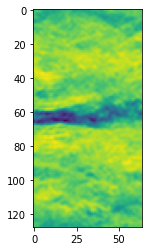

In [101]:
f = h5py.File('job/7D-yaw0/output/7D-yaw0_flowfield.h5','r')
U = f['u']
U = U[:,64:,:]
mean_U = np.mean(U,axis=0)
# U = U - mean_U
print(U.shape)

plt.imshow(U[99,:,:].T)
# plt.show()

[1024, 1920, 2816, 3712, 4608, 5504, 6400, 7296]
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


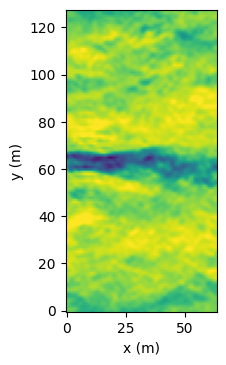

In [102]:

# wt = [1024+i*128*7 for i in range(8)]
yaw_max = [0.0,0,0,0,0,0,0,0]
yaw_freq = [0.0,0,0,0,0,0,0,0]
dt = 2
# *(sin(2*pi*dyn_yaw_freq(i_turb)*time))
print(wt)
fig = plt.figure(figsize=(12,4),dpi=100)
ax1 = plt.subplot(111)
# ax2 = plt.subplot(212)
def animate(i):
    print(i)
    ax1.cla()
    # ax2.cla()
    time = i*dt
    # ax1.set_titles(int(str(time))+' s')     
    ax1.imshow(U[i,:,:].T,origin='lower',vmin=2,vmax=11)
    # ax1.set_title((str(int(time)))+' s')     
    ax1.set_xlabel('x (m)')
    ax1.set_ylabel('y (m)')
anim = FuncAnimation(fig, animate, frames=100)
anim.save('animation_xy_static.gif',writer='pillow', fps=50)

In [103]:
dmd = DMD(svd_rank=11)
dmd.fit(U)
reconstructed_data = dmd.reconstructed_data
eig = dmd.eigs
mode_data = dmd.modes.T
dyn = dmd.dynamics

/home/moulin/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/moulin/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/moulin/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/moulin/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/moulin/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


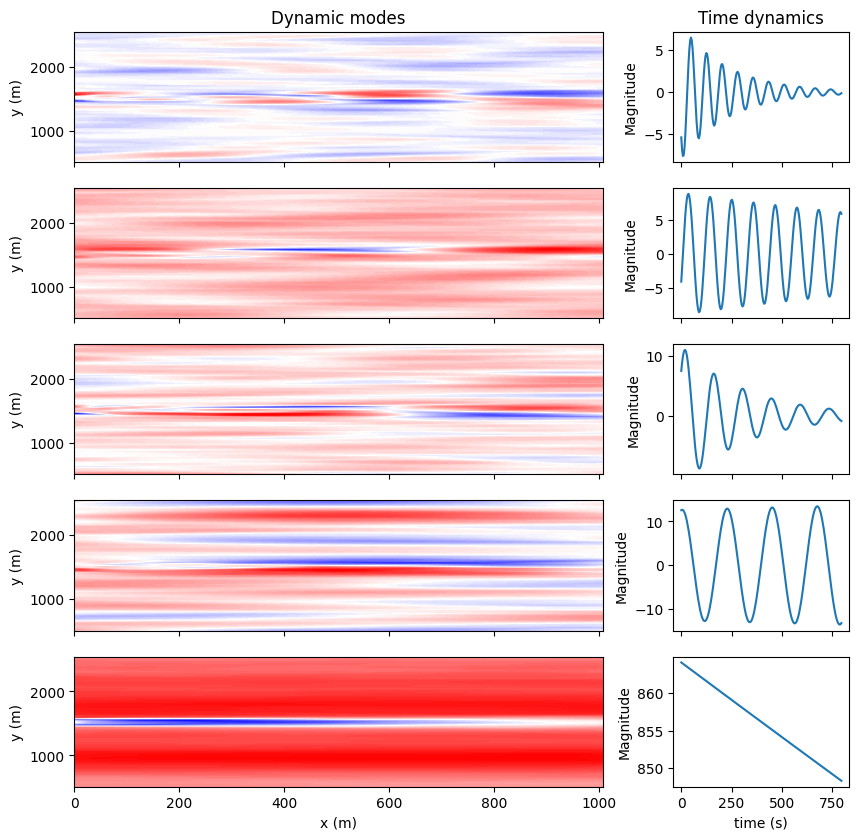

In [106]:
dx = 16
dy = dx
dt = 4

x = np.asarray(range(64))*dx
y = np.asarray(range(128))*dy+512
# print(x[100:])
time_series = [t*dt for t in range(200)]
fig,ax = plt.subplots(5,2,figsize=(10,10),dpi=100,gridspec_kw={'width_ratios': [3, 1]})
ax[0,0].set_title('Dynamic modes')
ax[0,1].set_title('Time dynamics')
for i in range(5):
    im = ax[i,0].contourf(x,y,np.real(np.reshape(mode_data[i*2,:],[U.shape[1],U.shape[2]]))[:,:].T,100,cmap='bwr')
    plt.axis('scaled')
    # im = ax[i,0].imshow(np.real(np.reshape(-mode_data[i*2+1,:],[U.shape[1],U.shape[2]]))[:,:].T,cmap='bwr')
    
    # ax[i,0].set_colorbar()
    if (i==4):
        ax[i,0].set_xlabel('x (m)')
        ax[i,1].set_xlabel('time (s)')
    # if (i==2):
    ax[i,0].set_ylabel('y (m)')
    ax[i,1].set_ylabel('Magnitude')
    if (i<4):
        ax[i,0].get_xaxis().set_ticklabels([])
        ax[i,1].get_xaxis().set_ticklabels([])
    ax[i,1].plot(time_series,dyn.T[:,i*2])
    # ax[i,1].set_ylim([-40,40])
    # for j in range(8):
    #     yaw_angle = 0.0
    #     ax[i,0].plot([wt[j]-64*np.sin(yaw_angle)-8,wt[j]+64*np.sin(yaw_angle)-8],[1024+64*np.cos(yaw_angle)-8,1024-64*np.cos(yaw_angle)-8],'k')
    # plt.colorbar(im,ax=ax[i,0])
# plt.colorbar()
plt.show()
# plt.savefig('DMD_static.png')